In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Need to run the required libraries

In [4]:
df= pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Need to run the csv file to get the dataset here we need to predict the capital_mw

In [5]:
df.shape

(907, 27)

In [6]:
df.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
count,907.000000,861.000000,861.000000,0.0,527.000000,0.0,519.0,0.0,398.000000,422.000000,434.000000,440.000000,448.000000,0.0,0.0
mean,326.223755,21.197918,77.464907,NaN,1997.091082,NaN,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,NaN
std,590.085456,6.239612,4.939316,NaN,17.082868,NaN,0.0,NaN,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,NaN,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2019.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,16.725000,16.773900,74.256200,NaN,1988.000000,NaN,2019.0,NaN,223.557672,176.381063,188.285252,177.874930,193.378250,NaN,NaN
50%,59.200000,21.780000,76.719500,NaN,2001.000000,NaN,2019.0,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN
75%,385.250000,25.512400,79.440800,NaN,2012.000000,NaN,2019.0,NaN,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,NaN,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2019.0,NaN,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN,NaN


In [7]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [8]:
df['latitude'].fillna(df['latitude'].mode()[0], inplace=True)


In [9]:
df['longitude'].fillna(df['longitude'].mode()[0], inplace=True)


In [10]:
df['other_fuel1'].fillna(df['other_fuel1'].mode()[0], inplace=True)


In [11]:
df['other_fuel2'].fillna(df['other_fuel2'].mode()[0], inplace=True)


In [12]:
df['commissioning_year'].fillna(df['commissioning_year'].mode()[0], inplace=True)

In [13]:
df['owner'].fillna(df['owner'].mode()[0], inplace=True)

In [14]:
df['geolocation_source'].fillna(df['geolocation_source'].mode()[0], inplace=True)

In [15]:
df['year_of_capacity_data'].fillna(df['year_of_capacity_data'].mode()[0], inplace=True)

In [16]:
df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].mode()[0], inplace=True)

In [17]:
df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].mode()[0], inplace=True)

In [18]:
df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].mode()[0], inplace=True)

In [19]:
df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].mode()[0], inplace=True)

In [20]:
df['generation_gwh_2018'].fillna(df['generation_gwh_2018'].mode()[0], inplace=True)

In [21]:
df['generation_data_source'].fillna(df['generation_data_source'].mode()[0], inplace=True)

In [22]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                      0
longitude                     0
primary_fuel                  0
other_fuel1                   0
other_fuel2                   0
other_fuel3                 907
commissioning_year            0
owner                         0
source                        0
url                           0
geolocation_source            0
wepp_id                     907
year_of_capacity_data         0
generation_gwh_2013         907
generation_gwh_2014           0
generation_gwh_2015           0
generation_gwh_2016           0
generation_gwh_2017           0
generation_gwh_2018           0
generation_gwh_2019         907
generation_data_source        0
estimated_generation_gwh    907
dtype: int64

Here we need to remove the null values from the dataset so that we can predict the correct capital_mw

In [23]:
df.drop(['other_fuel3'], axis=1, inplace=True)

In [24]:
df.drop(['wepp_id'], axis=1, inplace=True)

In [25]:
df.drop(['generation_gwh_2013'], axis=1, inplace=True)

In [26]:
df.drop(['generation_gwh_2019'], axis=1, inplace=True)

In [27]:
df.drop(['estimated_generation_gwh'], axis=1, inplace=True)

In [28]:
df.drop(['country'], axis=1, inplace=True)

In [29]:
df.drop(['country_long'], axis=1, inplace=True)

In [30]:
df.drop(['name'], axis=1, inplace=True)

In [31]:
df.drop(['gppd_idnr'], axis=1, inplace=True)

In [32]:
df.drop(['other_fuel1'], axis=1, inplace=True)

In [33]:
df.drop(['other_fuel2'], axis=1, inplace=True)

In [34]:
df.drop(['year_of_capacity_data'], axis=1, inplace=True)

In [35]:
df.drop(['generation_gwh_2014'], axis=1, inplace=True)

In [36]:
df.drop(['generation_gwh_2015'], axis=1, inplace=True)

In [37]:
df.drop(['generation_gwh_2016'], axis=1, inplace=True)

In [38]:
df.drop(['generation_gwh_2017'], axis=1, inplace=True)

In [39]:
df.drop(['generation_gwh_2018'], axis=1, inplace=True)

In [40]:
df.drop(['generation_data_source'], axis=1, inplace=True)

In [41]:
df.isnull().sum()

capacity_mw           0
latitude              0
longitude             0
primary_fuel          0
commissioning_year    0
owner                 0
source                0
url                   0
geolocation_source    0
dtype: int64

In [42]:
df.drop(['owner'], axis=1, inplace=True)

In [43]:
df.drop(['source'], axis=1, inplace=True)

In [44]:
df.drop(['url'], axis=1, inplace=True)

In [45]:
df.drop(['geolocation_source'], axis=1, inplace=True)

Drop the unnecessary data from the dataset for the prediction

In [46]:
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print("Categorical Columns: ", categorical_col)
print("\n")

numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print("Numerical Columns: ", numerical_col)

Categorical Columns:  ['primary_fuel']


Numerical Columns:  ['capacity_mw', 'latitude', 'longitude', 'commissioning_year']


Need to check the numerical and categorical data from the dataset. We need to convert the categorical data into numerical data

In [47]:
df=pd.get_dummies(df).astype(int)
df.head()

,capacity_mw,latitude,longitude,commissioning_year,primary_fuel_Biomass,primary_fuel_Coal,primary_fuel_Gas,primary_fuel_Hydro,primary_fuel_Nuclear,primary_fuel_Oil,primary_fuel_Solar,primary_fuel_Wind
0,2,28,73,2011,0,0,0,0,0,0,1,0
1,98,24,74,2015,0,1,0,0,0,0,0,0
2,39,21,69,2015,0,0,0,0,0,0,0,1
3,135,23,91,2004,0,0,1,0,0,0,0,0
4,1800,21,82,2015,0,1,0,0,0,0,0,0


Created the dummy dataset to convert the strings into integer

In [48]:
df.skew()

capacity_mw             3.123272
latitude               -0.113027
longitude               1.095129
commissioning_year     -1.714873
primary_fuel_Biomass    3.904966
primary_fuel_Coal       0.957114
primary_fuel_Gas        3.203310
primary_fuel_Hydro      0.999736
primary_fuel_Nuclear    9.905160
primary_fuel_Oil        6.520208
primary_fuel_Solar      2.078180
primary_fuel_Wind       2.132112
dtype: float64

In [49]:
df['capacity_mw'] = np.cbrt(df['capacity_mw'])

In [50]:
df['longitude'] = np.cbrt(df['longitude'])

In [51]:
df['primary_fuel_Biomass'] = np.cbrt(df['primary_fuel_Biomass'])

In [52]:
df['primary_fuel_Gas'] = np.cbrt(df['primary_fuel_Gas'])

In [53]:
df['primary_fuel_Nuclear'] = np.cbrt(df['primary_fuel_Nuclear'])

In [54]:
df['primary_fuel_Oil'] = np.cbrt(df['primary_fuel_Oil'])

In [55]:
df['primary_fuel_Solar'] = np.cbrt(df['primary_fuel_Solar'])

In [56]:
df['primary_fuel_Wind'] = np.cbrt(df['primary_fuel_Wind'])

<AxesSubplot:>

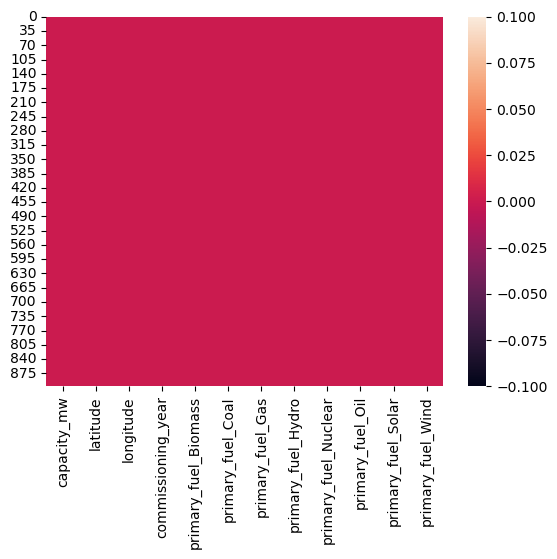

In [57]:
sns.heatmap(df.isnull())

Created the heatmap for the null values

4.254321    115
4.198336     93
4.235824     90
4.217163     76
4.140818     69
4.160168     60
4.179339     60
4.290840     56
4.272659     48
4.344481     36
4.121285     31
4.326749     27
4.308869     25
4.447960     20
4.362071     17
4.101566     14
4.414005     12
4.396830     12
4.497941     11
4.431048     10
4.081655      7
4.514357      7
4.379519      3
4.530655      3
4.546836      2
4.562903      2
4.481405      1
Name: longitude, dtype: int64


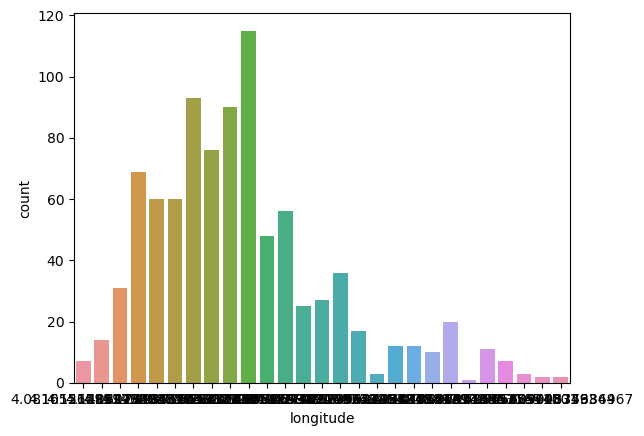

In [58]:
ax=sns.countplot(x='longitude', data=df)
print(df['longitude'].value_counts())

Created the countplot for the longitude

19    89
23    75
21    63
27    61
22    56
24    54
16    47
18    45
17    39
26    32
25    30
11    29
15    29
9     28
20    27
14    24
10    24
31    23
28    22
30    19
32    17
29    17
8     16
12    15
13    12
34    10
33     4
Name: latitude, dtype: int64


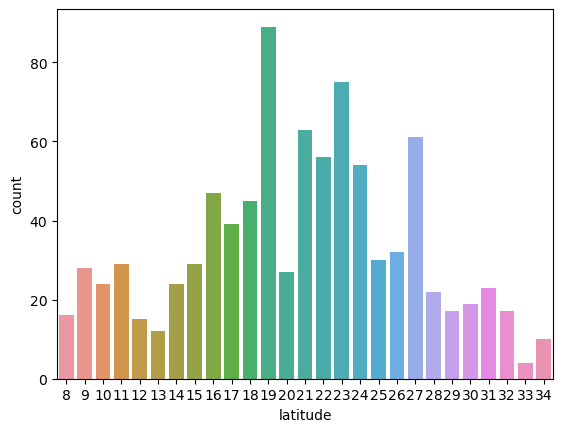

In [59]:
ax=sns.countplot(x='latitude', data=df)
print(df['latitude'].value_counts())

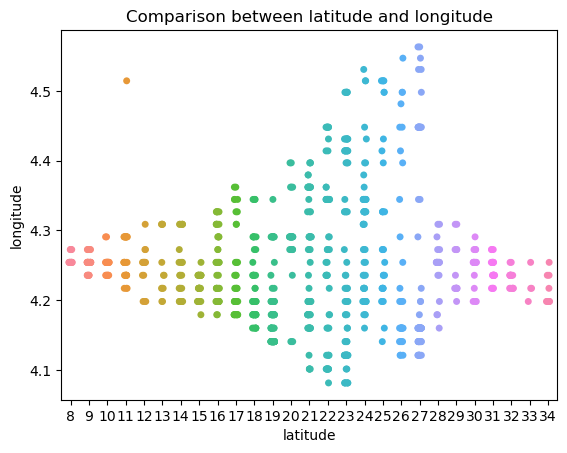

In [60]:
plt.title("Comparison between latitude and longitude")
sns.stripplot(x= "latitude", y="longitude", data=df)
plt.show()

Created the stripplot for the latitude from the dataset

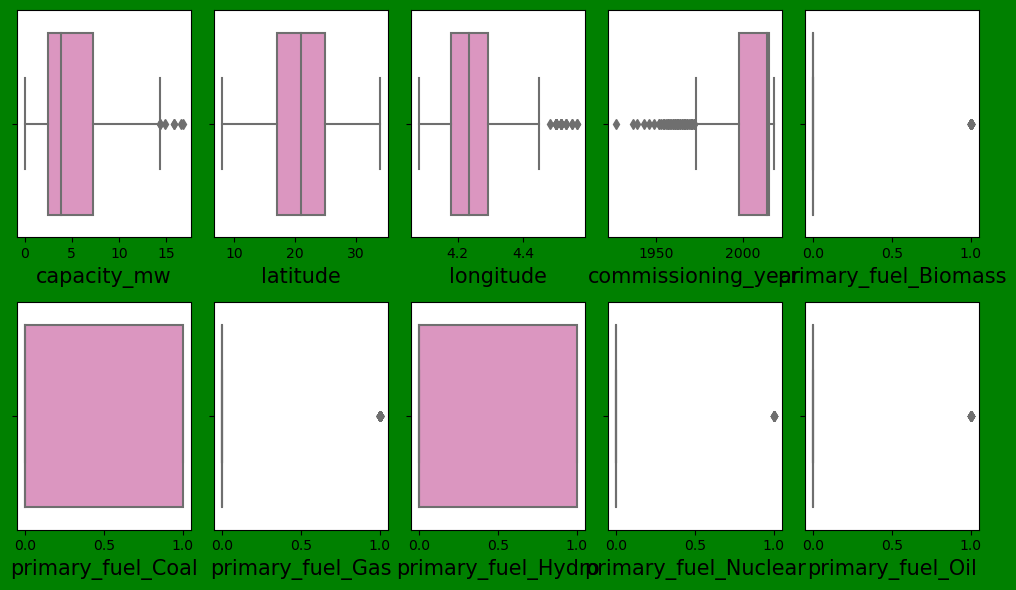

In [61]:
plt.figure(figsize=(10,6), facecolor= 'green')
plotnumber=1
for col in df:
    if plotnumber<=10:
        ax=plt.subplot(2,5, plotnumber)
        sns.boxplot(df[col], palette="Set2_r")
        plt.xlabel(col, fontsize=15)
        plt.yticks(rotation=0, fontsize=10)
        plotnumber+=1
    plt.tight_layout()

Created the subplot from the dataset to check the skewness for the dataset

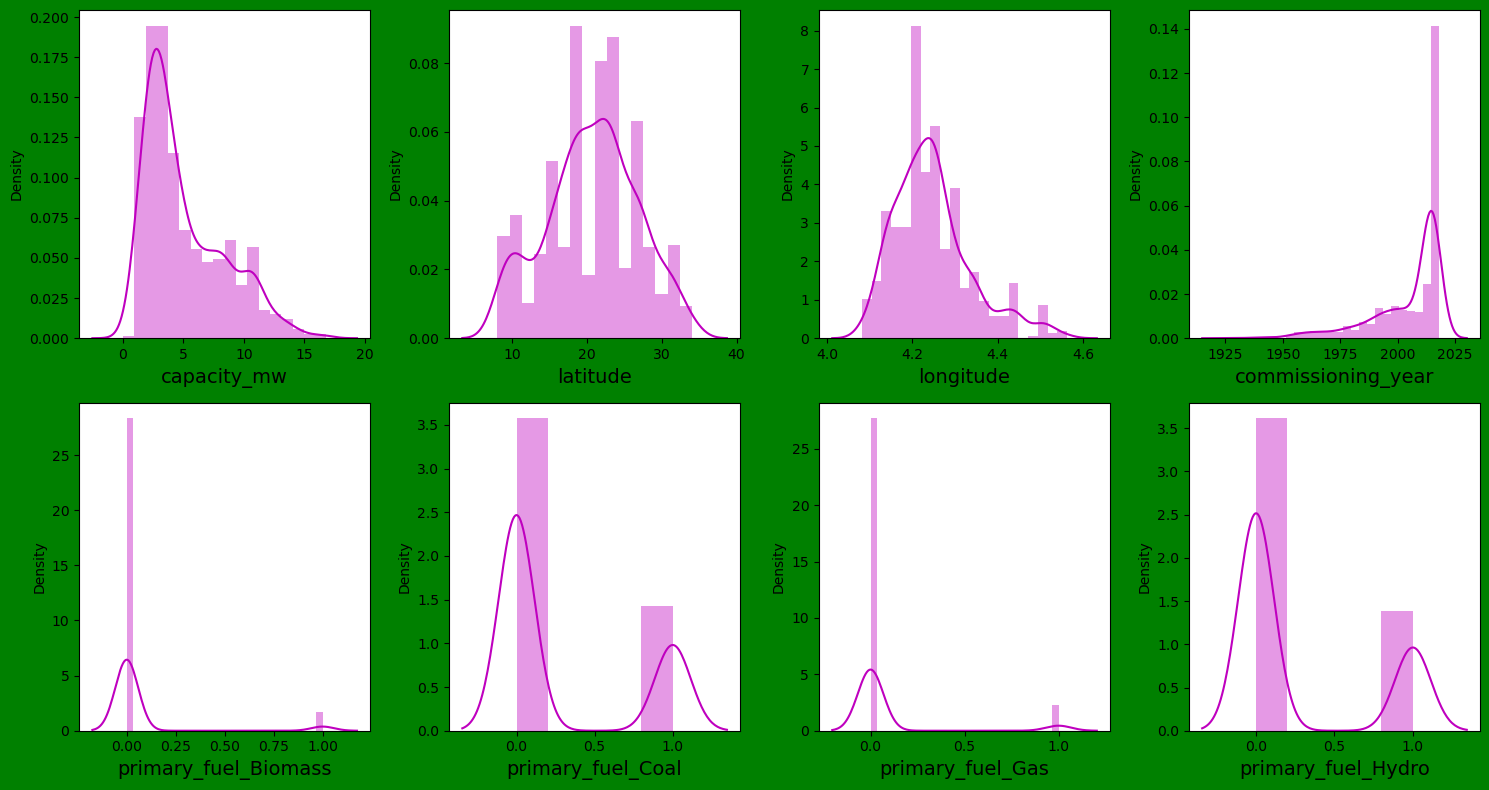

In [62]:
plt.figure(figsize=(15,8), facecolor= "green")
plotnumber=1
for col in df:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.distplot(df[col], color="m")
        plt.xlabel(col, fontsize = 14)
        plt.yticks(rotation=0, fontsize=10)
        plotnumber+=1
        plt.tight_layout()

Subplot is created to verify the skewness and outliers 

In [63]:
cor= df.corr()
cor

,capacity_mw,latitude,longitude,commissioning_year,primary_fuel_Biomass,primary_fuel_Coal,primary_fuel_Gas,primary_fuel_Hydro,primary_fuel_Nuclear,primary_fuel_Oil,primary_fuel_Solar,primary_fuel_Wind
capacity_mw,1.000000,0.080390,0.311036,-0.082747,-0.174592,0.555247,0.119204,-0.079240,0.130018,-0.044754,-0.355381,-0.262291
latitude,0.080390,1.000000,0.042687,0.035232,-0.146043,0.052176,-0.050196,0.097163,-0.050443,-0.084400,0.186432,-0.197647
longitude,0.311036,0.042687,1.000000,-0.148096,-0.067828,0.277134,0.057762,0.141523,-0.018785,-0.086332,-0.235010,-0.268970
commissioning_year,-0.082747,0.035232,-0.148096,1.000000,0.159824,0.153482,-0.000001,-0.624813,-0.051173,-0.017610,0.264368,0.262085
primary_fuel_Biomass,-0.174592,-0.146043,-0.067828,0.159824,1.000000,-0.152294,-0.069310,-0.149410,-0.024181,-0.036270,-0.097465,-0.095673
primary_fuel_Coal,0.555247,0.052176,0.277134,0.153482,-0.152294,1.000000,-0.180921,-0.390007,-0.063121,-0.094676,-0.254415,-0.249737
primary_fuel_Gas,0.119204,-0.050196,0.057762,-0.000001,-0.069310,-0.180921,1.000000,-0.177496,-0.028727,-0.043088,-0.115786,-0.113657
primary_fuel_Hydro,-0.079240,0.097163,0.141523,-0.624813,-0.149410,-0.390007,-0.177496,1.000000,-0.061925,-0.092883,-0.249597,-0.245008
primary_fuel_Nuclear,0.130018,-0.050443,-0.018785,-0.051173,-0.024181,-0.063121,-0.028727,-0.061925,1.000000,-0.015033,-0.040396,-0.039653
primary_fuel_Oil,-0.044754,-0.084400,-0.086332,-0.017610,-0.036270,-0.094676,-0.043088,-0.092883,-0.015033,1.000000,-0.060591,-0.059477


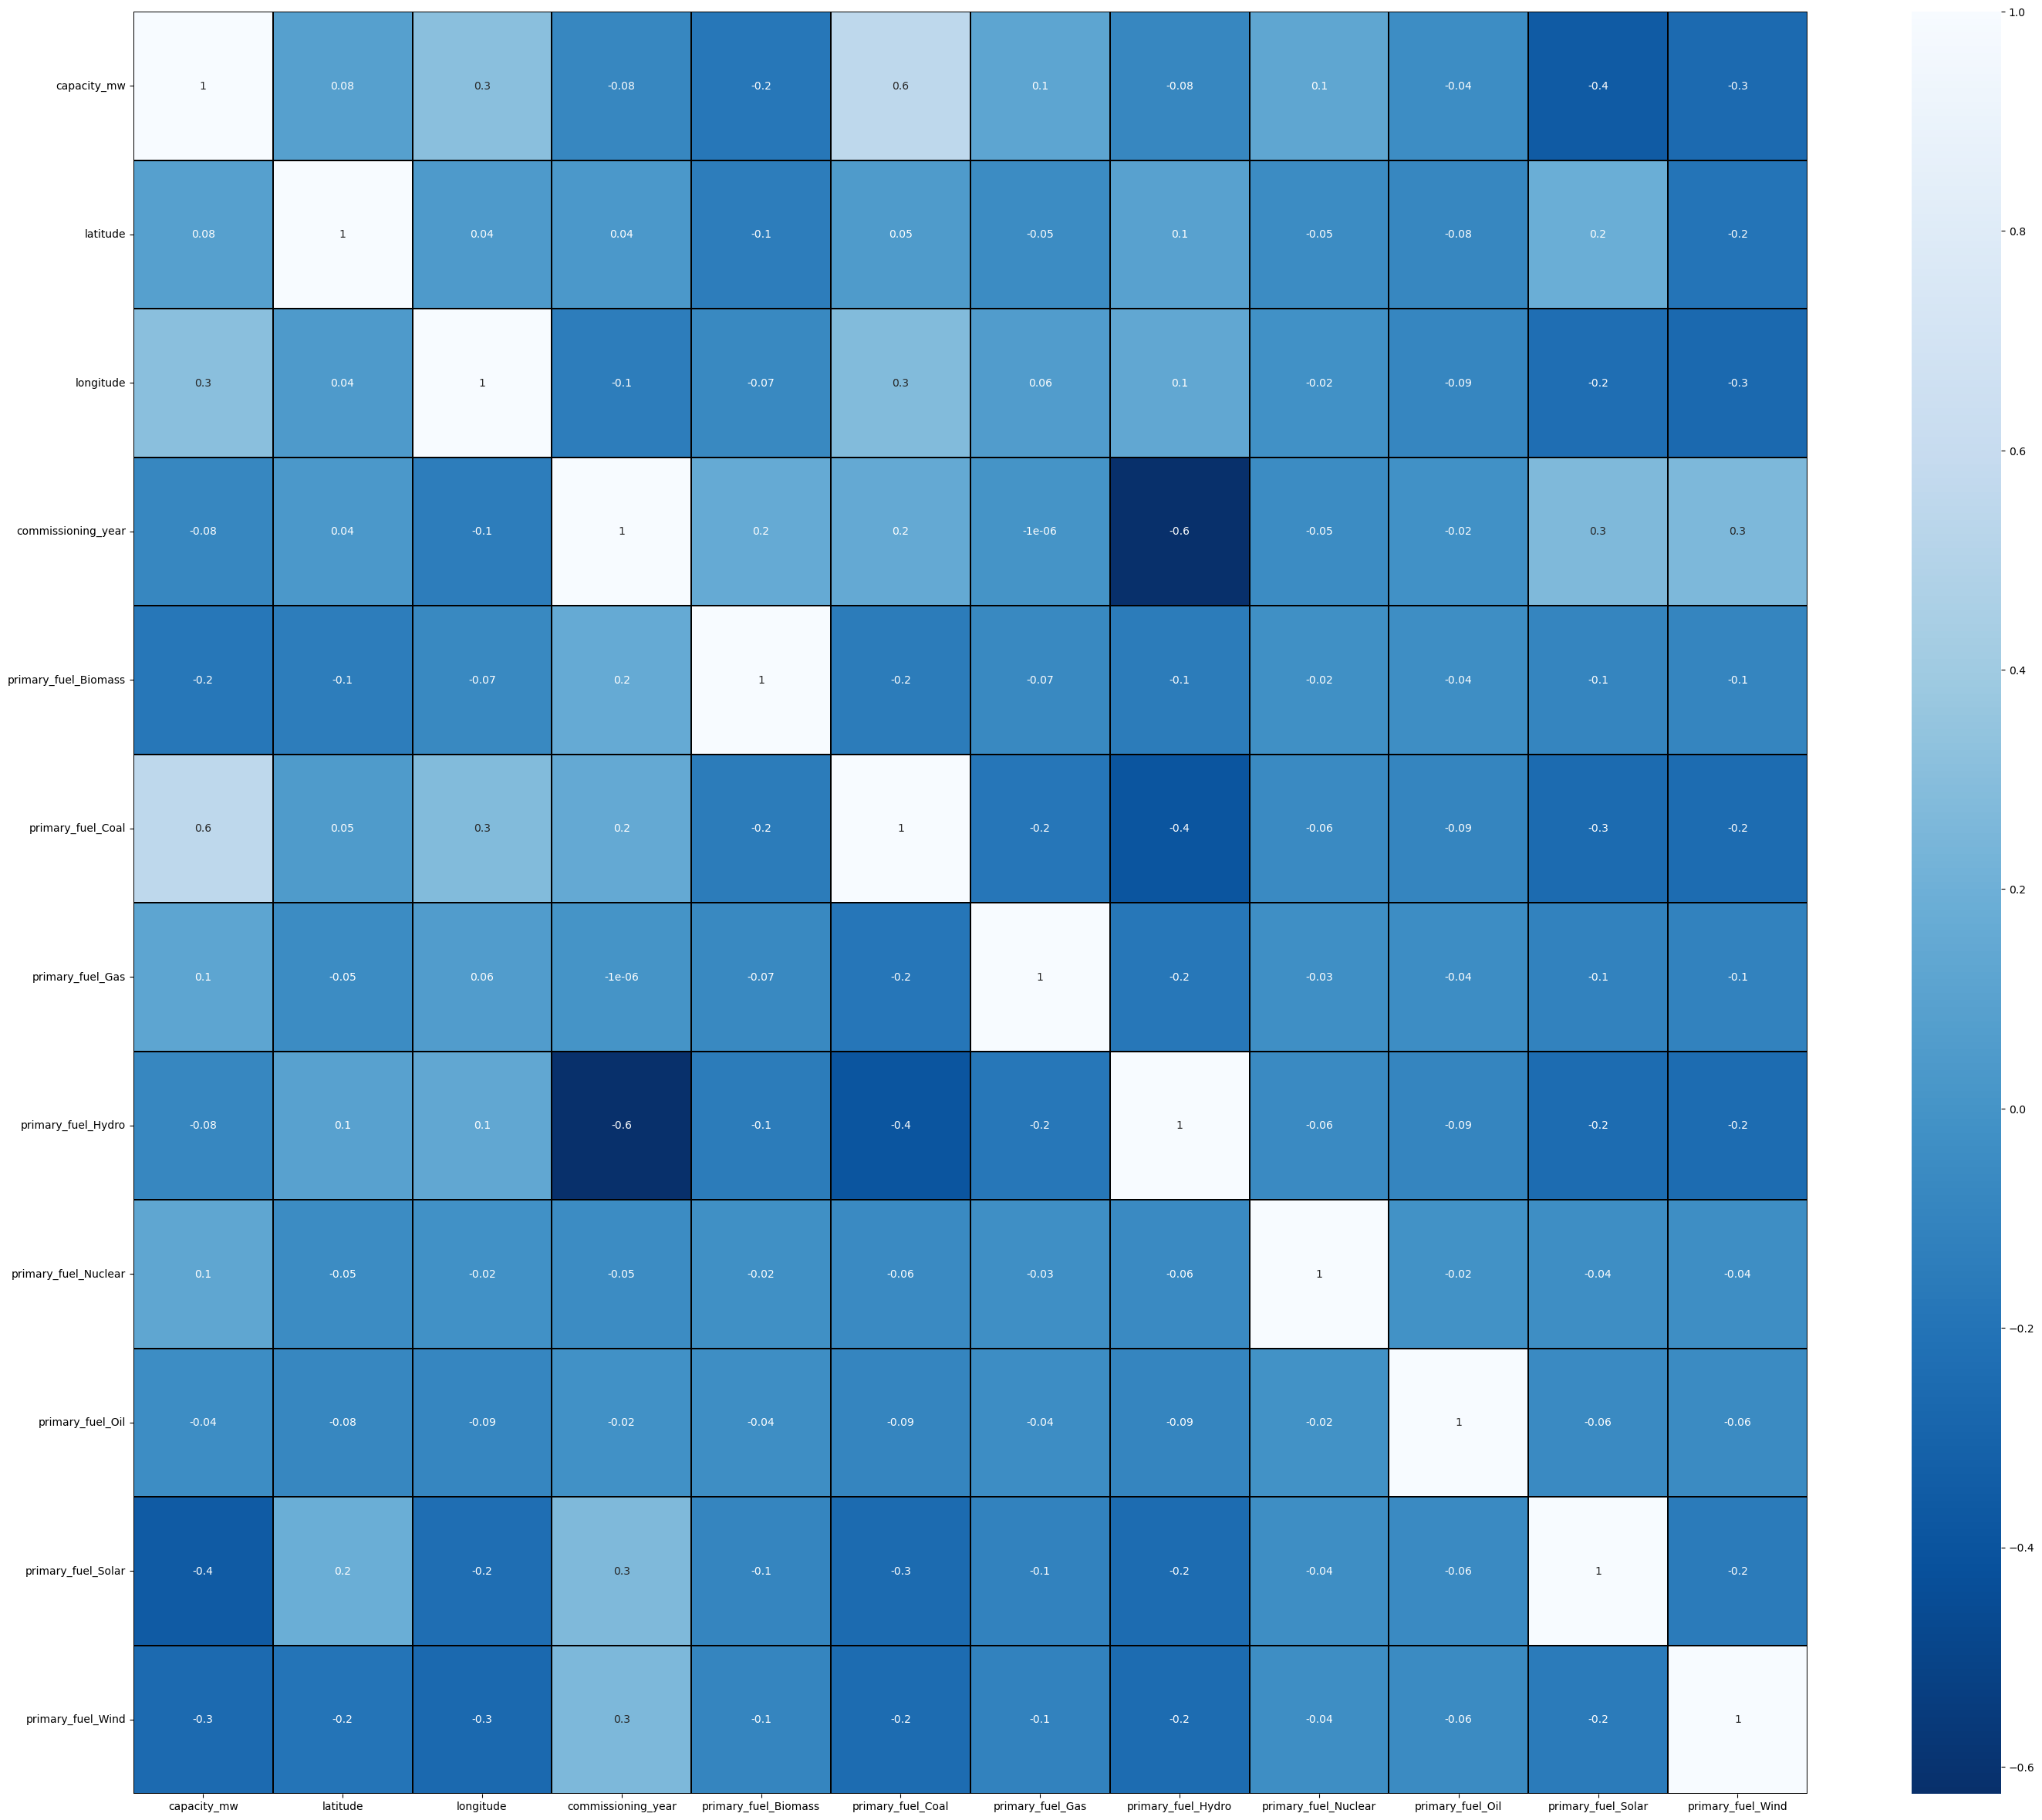

In [64]:
plt.figure(figsize=(35,30))
sns.heatmap(df.corr(), linewidths=0.1, fmt=".1g", linecolor="black", annot= True, cmap= "Blues_r")
plt.yticks(rotation=0);
plt.show()

Checking the corelation for the dataset

In [65]:
y=df['capacity_mw']
x=df.drop('capacity_mw',axis=1)

In [71]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,latitude,longitude,commissioning_year,primary_fuel_Biomass,primary_fuel_Coal,primary_fuel_Gas,primary_fuel_Hydro,primary_fuel_Nuclear,primary_fuel_Oil,primary_fuel_Solar,primary_fuel_Wind
0,1.205674,-0.737869,0.407327,-0.241543,-0.630504,-0.286948,-0.618564,-0.100111,-0.15016,2.478252,-0.396091
1,0.550954,-0.528015,0.661679,-0.241543,1.586034,-0.286948,-0.618564,-0.100111,-0.15016,-0.403510,-0.396091
2,0.059914,-1.596993,0.661679,-0.241543,-0.630504,-0.286948,-0.618564,-0.100111,-0.15016,-0.403510,2.524675
3,0.387274,2.781578,-0.037788,-0.241543,-0.630504,3.484957,-0.618564,-0.100111,-0.15016,-0.403510,-0.396091
4,0.059914,1.086379,0.661679,-0.241543,1.586034,-0.286948,-0.618564,-0.100111,-0.15016,-0.403510,-0.396091
...,...,...,...,...,...,...,...,...,...,...,...
902,-0.758486,0.090418,0.725267,-0.241543,1.586034,-0.286948,-0.618564,-0.100111,-0.15016,-0.403510,-0.396091
903,-1.413206,0.292987,0.661679,-0.241543,-0.630504,-0.286948,-0.618564,-0.100111,-0.15016,2.478252,-0.396091
904,-0.922166,-0.320043,0.661679,-0.241543,-0.630504,-0.286948,-0.618564,-0.100111,-0.15016,-0.403510,2.524675
905,0.550954,-0.737869,0.661679,-0.241543,1.586034,-0.286948,-0.618564,-0.100111,-0.15016,-0.403510,-0.396091


In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [73]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [74]:
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared (R2) Score: {r2}')

Mean Squared Error: 5.396285123597517
R-squared (R2) Score: 0.4244632311341815


Created the models for the dataset to verify the capital_mw

In [75]:
import joblib
joblib.dump(model,"capacity_mw.pkl")

['capacity_mw.pkl']

In [76]:
model = joblib.load("capacity_mw.pkl")
prediction = model.predict(X_test)
prediction

array([6.01684547, 2.77425423, 5.10280542, 4.51307085, 4.31524655,
       2.69472073, 4.32844495, 2.69472073, 7.72118327, 7.90090638,
       7.86922324, 7.83183135, 2.75646331, 7.89288107, 4.26780717,
       2.84475058, 2.69472073, 4.3291773 , 4.37493371, 4.67383965,
       1.90637718, 2.80593737, 2.35645887, 4.87901711, 7.8375401 ,
       2.75646331, 8.27421626, 2.16624514, 2.13829724, 3.01633126,
       8.28732243, 4.80919213, 6.2658095 , 8.02692484, 4.77497775,
       5.04741368, 5.05884814, 8.08691281, 4.35938433, 7.92456421,
       6.4035967 , 4.8279061 , 7.95071942, 4.18506479, 2.69472073,
       8.12329401, 9.39839817, 2.55724342, 6.29082925, 2.24137197,
       2.82145329, 4.26588157, 2.78000006, 8.09963821, 2.97148314,
       4.14246969, 7.89288107, 7.86922324, 7.22993873, 4.50900833,
       6.06458594, 8.35279313, 7.93258952, 7.64895141, 2.0300088 ,
       2.53093366, 4.47305989, 1.96298131, 2.86967611, 7.20133235,
       4.37245931, 2.93304239, 4.19128557, 4.56479222, 8.14271

In [77]:
a = np.array(y_test) 
df = pd.DataFrame()
df["Predicted"] = prediction
df["Original"]=a
df

,Predicted,Original
0,6.016845,5.718479
1,2.774254,3.684031
2,5.102805,3.448217
3,4.513071,9.165656
4,4.315247,1.587401
...,...,...
177,4.427008,4.932424
178,7.747804,11.447142
179,4.259657,1.587401
180,8.328657,7.719443


Finally we have predicted the capital_mw from the dataset